In [1]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

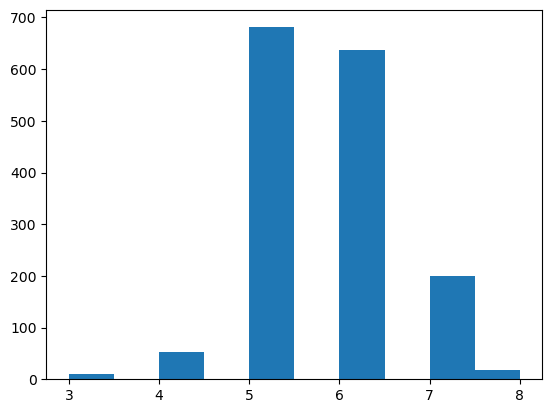

In [7]:
plt.hist(data.quality)

<Axes: xlabel='fixed acidity', ylabel='residual sugar'>

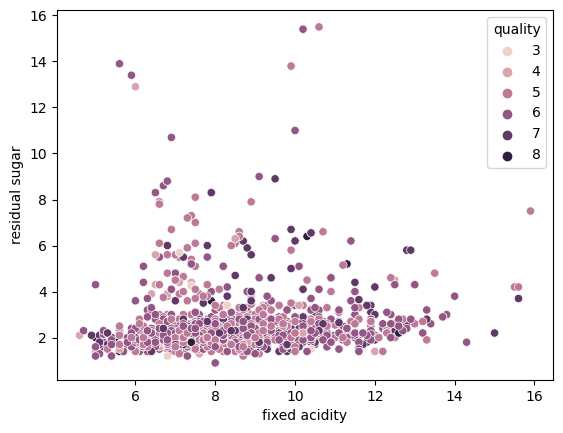

In [9]:
sns.scatterplot(x = "fixed acidity", y = "residual sugar", hue = "quality", data = data)

In [10]:
predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar"]
target_col = ['quality']

In [11]:
predictors = data[predictors_col]
target = data[target_col]

In [12]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar
0,7.4,0.700,0.00,1.9
1,7.8,0.880,0.00,2.6
2,7.8,0.760,0.04,2.3
3,11.2,0.280,0.56,1.9
4,7.4,0.700,0.00,1.9
...,...,...,...,...
1594,6.2,0.600,0.08,2.0
1595,5.9,0.550,0.10,2.2
1596,6.3,0.510,0.13,2.3
1597,5.9,0.645,0.12,2.0


In [13]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [14]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar
fixed acidity,1.000000,-0.256131,0.671703,0.114777
volatile acidity,-0.256131,1.000000,-0.552496,0.001918
citric acid,0.671703,-0.552496,1.000000,0.143577
residual sugar,0.114777,0.001918,0.143577,1.000000


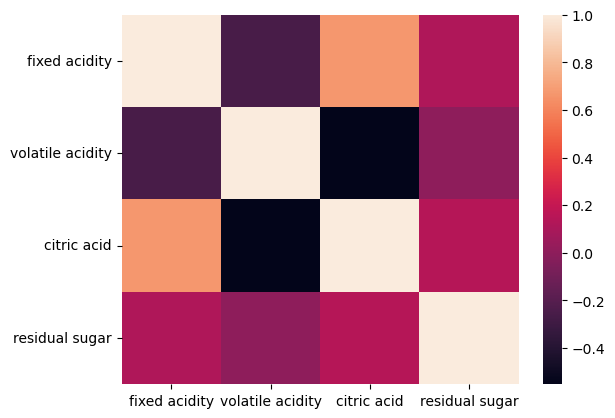

In [15]:
sns.heatmap(corr)
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

In [17]:
tree = DecisionTreeClassifier()

In [18]:
arbol = tree.fit(X_train, y_train)

[Text(0.5179759635562395, 0.9782608695652174, 'x[1] <= 0.548\ngini = 0.644\nsamples = 1199\nvalue = [8, 42, 500, 487, 150, 12]'),
 Text(0.21563614822327923, 0.9347826086956522, 'x[1] <= 0.317\ngini = 0.647\nsamples = 656\nvalue = [1, 13, 198, 312, 122, 10]'),
 Text(0.06141578063794068, 0.8913043478260869, 'x[1] <= 0.275\ngini = 0.601\nsamples = 133\nvalue = [0, 1, 14, 66, 50, 2]'),
 Text(0.029099048684946838, 0.8478260869565217, 'x[0] <= 8.35\ngini = 0.56\nsamples = 67\nvalue = [0, 1, 7, 40, 18, 1]'),
 Text(0.013430330162283156, 0.8043478260869565, 'x[2] <= 0.235\ngini = 0.318\nsamples = 27\nvalue = [0, 0, 3, 22, 2, 0]'),
 Text(0.01119194180190263, 0.7608695652173914, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.01566871852266368, 0.7608695652173914, 'x[1] <= 0.265\ngini = 0.272\nsamples = 26\nvalue = [0, 0, 2, 22, 2, 0]'),
 Text(0.01119194180190263, 0.717391304347826, 'x[2] <= 0.41\ngini = 0.226\nsamples = 24\nvalue = [0, 0, 2, 21, 1, 0]'),
 Text(0.00895355344152210

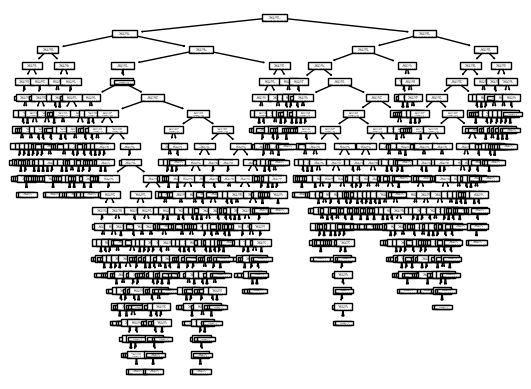

In [19]:
plot_tree(arbol)

In [20]:
predicciones = arbol.predict(X_test)

In [21]:
predicciones

array([6, 5, 5, 5, 4, 5, 5, 6, 5, 5, 5, 6, 5, 5, 7, 7, 6, 7, 6, 5, 5, 6,
       7, 5, 5, 5, 6, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 6, 6, 6, 6, 7, 6, 6,
       7, 7, 6, 7, 6, 6, 6, 4, 5, 5, 7, 5, 6, 7, 6, 5, 5, 6, 5, 7, 7, 7,
       7, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 6, 6, 5, 5,
       5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 7, 6, 5, 5, 5, 6, 6, 5, 7,
       6, 6, 7, 5, 7, 6, 7, 7, 4, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 7, 6, 5,
       6, 7, 6, 5, 7, 5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 4, 6, 5, 5, 6, 4,
       5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 4, 5, 5,
       5, 4, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 7, 6,
       5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6,
       5, 5, 6, 6, 6, 6, 5, 5, 4, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6,
       5, 6, 5, 6, 7, 5, 5, 5, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 5, 7, 7, 5,
       6, 6, 6, 7, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 7, 6, 5, 5, 5,
       5, 7, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6,

In [22]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7
Actual,,,,,
3,0,1,1,0,0
4,1,1,4,5,0
5,0,6,108,57,10
6,0,6,38,96,11
7,0,0,12,12,25
8,0,0,2,2,2


In [23]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.575